# Import libraries

In [1]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

import seaborn as sns

import json

from sklearn.feature_selection import mutual_info_classif

from collections import defaultdict

from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

In [3]:
path_to_save = './../results/03d_features_analysis'

# Loading data

In [4]:
path_to_ftir_data_3800_2500 = './../data/processed_data/dataset_3800_2500_engineered.csv'
path_to_ftir_data_1900_800 = './../data/processed_data/dataset_1900_800_engineered.csv'

path_to_features_description_3800_2500 = './../data/processed_data/features_description_3800_2500.json'
path_to_features_description_1900_800 = './../data/processed_data/features_description_1900_800.json'

## FTIR-features (*long-list*)

In [5]:
dataset_3800_2500 = pd.read_csv(path_to_ftir_data_3800_2500, sep=';', index_col=0)

print(dataset_3800_2500.shape)
dataset_3800_2500.head(3)

(74, 49)


$I_{2929}$  $I_{3354}$  $I_{3729}$  \
division_1_size_bulk    0.492348         1.0    0.086137   
division_1_size_5       0.407795         1.0    0.027761   
division_1_size_3       0.618445         1.0    0.076469   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.578485   
division_1_size_5                              1.435557   
division_1_size_3                              1.694914   

                      $\overline{I}_{2929 \pm 50}$  \
division_1_size_bulk                      0.495064   
division_1_size_5                         0.397724   
division_1_size_3                         0.581710   

                      $\overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                      0.982638   
division_1_size_5                         0.981965   
division_1_size_3                         0.981511   

                      $\overline{I}_{3729 \pm 50}$  $\log I_{2929}$  \
division_1_size_bulk                      0.073064        -0.708570   
division_1_size_5                         0.031888        -0.896990   
division_1_size_3                         0.064533        -0.480547   

                      $(I_{2929})^{-1}$  $\log I_{3354}$  $(I_{3354})^{-1}$  \
division_1_size_bulk           2.031084              0.0                1.0   
division_1_size_5              2.452211              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3729}$  $(I_{3729})^{-1}$  \
division_1_size_bulk        -2.451816          11.609410   
division_1_size_5           -3.584116          36.021499   
division_1_size_3           -2.570874          13.077247   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.456465   
division_1_size_5                                   0.361553   
division_1_size_3                                   0.527632   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.633519   
division_1_size_5                                     0.696594   
division_1_size_3                                     0.590001   

                      $\log \overline{I}_{2929 \pm 50}$  \
division_1_size_bulk                          -0.703069   
division_1_size_5                             -0.921996   
division_1_size_3                             -0.541784   

                      $(\overline{I}_{2929 \pm 50})^{-1}$  \
division_1_size_bulk                             2.019942   
division_1_size_5                                2.514305   
division_1_size_3                                1.719070   

                      $\log \overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                          -0.017515   
division_1_size_5                             -0.018199   
division_1_size_3                             -0.018662   

                      $(\overline{I}_{3354 \pm 50})^{-1}$  \
division_1_size_bulk                             1.017669   
division_1_size_5                                1.018366   
division_1_size_3                                1.018837   

                      

In [6]:
dataset_1900_800 = pd.read_csv(path_to_ftir_data_1900_800, sep=';', index_col=0)

print(dataset_1900_800.shape)
dataset_1900_800.head(3)

(74, 207)


$I_{871}$  $I_{1105}$  $I_{1242}$  $I_{1392}$  \
division_1_size_bulk   0.047336    0.629083    0.457299    0.760582   
division_1_size_5      0.091015    0.606138    0.429170    0.687458   
division_1_size_3      0.105957    0.836176    0.401639    0.696553   

                      $I_{1613}$  $I_{1727}$  \
division_1_size_bulk         1.0    0.420572   
division_1_size_5            1.0    0.382157   
division_1_size_3            1.0    0.364482   

                      $\overline{I}_{1900\text{–}800}$  \
division_1_size_bulk                          0.424162   
division_1_size_5                             0.378730   
division_1_size_3                             0.436266   

                      $\Sigma I_{p,\ 1900\text{–}800}$  \
division_1_size_bulk                          3.314872   
division_1_size_5                             3.195938   
division_1_size_3                             3.404806   

                      $\overline{I}_{1900\text{–}1500}$  \
division_1_size_bulk                           0.426619   
division_1_size_5                              0.378004   
division_1_size_3                              0.429362   

                      $\Sigma I_{p,\ 1900\text{–}1500}$  \
division_1_size_bulk                           1.420572   
division_1_size_5                              1.382157   
division_1_size_3                              1.364482   

                      $\overline{I}_{1500\text{–}1300}$  \
division_1_size_bulk                           0.571735   
division_1_size_5                              0.502368   
division_1_size_3                              0.523513   

                      $\Sigma I_{p,\ 1500\text{–}1300}$  \
division_1_size_bulk                           0.760582   
division_1_size_5                              0.687458   
division_1_size_3                              0.696553   

                      $\overline{I}_{1300\text{–}800}$  \
division_1_size_bulk                          0.363338   
division_1_size_5                             0.329999   
division_1_size_3                             0.406988   

                      $\Sigma I_{p,\ 1300\text{–}800}$  \
division_1_size_bulk                          1.133718   
division_1_size_5                             1.126322   
division_1_size_3                             1.343771   

                      $\overline{I}_{871 \pm 25}$  \
division_1_size_bulk                     0.046925   
division_1_size_5                        0.092522   
division_1_size_3                        0.110049   

                      $\overline{I}_{1105 \pm 25}$  \
division_1_size_bulk                      0.628121   
division_1_size_5                         0.593910   
division_1_size_3                         0.816077   

                      $\overline{I}_{1242 \pm 25}$  \
division_1_size_bulk                      0.449752   
division_1_size_5                         0.425824   
division_1_size_3                         0.401577   

                      $\overline{I}_{1392 \pm 25}$  \
division_1_size_bulk                      0.739816   
division_1_size_5                         0.668544   
division_1_size_3                         0.678028   

                      $\overline{I}_{1613 \pm 25}$  \
division_1_size_bulk                      0.939500   
division_1_size_5                         0.930634   
division_1_size_3                         0.953537   

                      $\overline{I}_{1727 \pm 25}$  $\log I_{871}$  \
division_1_size_bulk                      0.414105       -3.050490   
division_1_size_5                         0.374613       -2.396730   
division_1_size_3                         0.363813       -2.244726   

                      $(I_{871})^{-1}$  $\log I_{1105}$  $(I_{1105})^{-1}$  \
division_1_size_bulk         21.125702        -0.463491           1.589614   
division_1_size_5            10.987189        -0.500648           1.649790   
division_1_size_3             9.437829        -0.178917           1.

## Features description

In [7]:
with open(path_to_features_description_3800_2500, 'r', encoding='utf-8') as f:
    features_description_3800_2500 = json.load(f)

In [8]:
with open(path_to_features_description_1900_800, 'r', encoding='utf-8') as f:
    features_description_1900_800 = json.load(f)

# Data wrangling

## Merging dataframes and dicts

In [9]:
data = pd.merge(
    left=dataset_3800_2500.loc[:, ~dataset_3800_2500.columns.isin(['Split', 'Fraction_hue', 'Fraction_grouped_hue', 'Class'])],
    right=dataset_1900_800,
    left_index=True,
    right_index=True
)

print(data.shape)
data.head(3)

(74, 252)


$I_{2929}$  $I_{3354}$  $I_{3729}$  \
division_1_size_bulk    0.492348         1.0    0.086137   
division_1_size_5       0.407795         1.0    0.027761   
division_1_size_3       0.618445         1.0    0.076469   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.578485   
division_1_size_5                              1.435557   
division_1_size_3                              1.694914   

                      $\overline{I}_{2929 \pm 50}$  \
division_1_size_bulk                      0.495064   
division_1_size_5                         0.397724   
division_1_size_3                         0.581710   

                      $\overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                      0.982638   
division_1_size_5                         0.981965   
division_1_size_3                         0.981511   

                      $\overline{I}_{3729 \pm 50}$  $\log I_{2929}$  \
division_1_size_bulk                      0.073064        -0.708570   
division_1_size_5                         0.031888        -0.896990   
division_1_size_3                         0.064533        -0.480547   

                      $(I_{2929})^{-1}$  $\log I_{3354}$  $(I_{3354})^{-1}$  \
division_1_size_bulk           2.031084              0.0                1.0   
division_1_size_5              2.452211              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3729}$  $(I_{3729})^{-1}$  \
division_1_size_bulk        -2.451816          11.609410   
division_1_size_5           -3.584116          36.021499   
division_1_size_3           -2.570874          13.077247   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.456465   
division_1_size_5                                   0.361553   
division_1_size_3                                   0.527632   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.633519   
division_1_size_5                                     0.696594   
division_1_size_3                                     0.590001   

                      $\log \overline{I}_{2929 \pm 50}$  \
division_1_size_bulk                          -0.703069   
division_1_size_5                             -0.921996   
division_1_size_3                             -0.541784   

                      $(\overline{I}_{2929 \pm 50})^{-1}$  \
division_1_size_bulk                             2.019942   
division_1_size_5                                2.514305   
division_1_size_3                                1.719070   

                      $\log \overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                          -0.017515   
division_1_size_5                             -0.018199   
division_1_size_3                             -0.018662   

                      $(\overline{I}_{3354 \pm 50})^{-1}$  \
division_1_size_bulk                             1.017669   
division_1_size_5                                1.018366   
division_1_size_3                                1.018837   

                      

In [10]:
features_description = {}

for d in (features_description_3800_2500, features_description_1900_800):
    for k, v in d.items():
        features_description.setdefault(k, []).extend(v)

print(features_description.keys())

dict_keys(['base_features_peaks_3800_2500', 'base_features_intervals_3800_2500', 'engineered_features_peaks_3800_2500', 'engineered_features_intervals_3800_2500', 'base_features', 'engineered_features', 'base_features_peaks_1900_800', 'base_features_intervals_1900_800', 'engineered_features_peaks_1900_800', 'engineered_features_intervals_1900_800'])


## Base parameters

In [11]:
features_df = data.loc[:, ~data.columns.isin(['Split', 'Fraction_hue', 'Fraction_grouped_hue', 'Class'])]

print(features_df.shape)
features_df.head(3)

(74, 248)


$I_{2929}$  $I_{3354}$  $I_{3729}$  \
division_1_size_bulk    0.492348         1.0    0.086137   
division_1_size_5       0.407795         1.0    0.027761   
division_1_size_3       0.618445         1.0    0.076469   

                      $\overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                           0.526201   
division_1_size_5                              0.477909   
division_1_size_3                              0.535789   

                      $\Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                           1.578485   
division_1_size_5                              1.435557   
division_1_size_3                              1.694914   

                      $\overline{I}_{2929 \pm 50}$  \
division_1_size_bulk                      0.495064   
division_1_size_5                         0.397724   
division_1_size_3                         0.581710   

                      $\overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                      0.982638   
division_1_size_5                         0.981965   
division_1_size_3                         0.981511   

                      $\overline{I}_{3729 \pm 50}$  $\log I_{2929}$  \
division_1_size_bulk                      0.073064        -0.708570   
division_1_size_5                         0.031888        -0.896990   
division_1_size_3                         0.064533        -0.480547   

                      $(I_{2929})^{-1}$  $\log I_{3354}$  $(I_{3354})^{-1}$  \
division_1_size_bulk           2.031084              0.0                1.0   
division_1_size_5              2.452211              0.0                1.0   
division_1_size_3              1.616959              0.0                1.0   

                      $\log I_{3729}$  $(I_{3729})^{-1}$  \
division_1_size_bulk        -2.451816          11.609410   
division_1_size_5           -3.584116          36.021499   
division_1_size_3           -2.570874          13.077247   

                      $\log \overline{I}_{3800\text{–}2500}$  \
division_1_size_bulk                               -0.642072   
division_1_size_5                                  -0.738335   
division_1_size_3                                  -0.624015   

                      $(\overline{I}_{3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  1.900414   
division_1_size_5                                     2.092448   
division_1_size_3                                     1.866407   

                      $\log \Sigma I_{p,\ 3800\text{–}2500}$  \
division_1_size_bulk                                0.456465   
division_1_size_5                                   0.361553   
division_1_size_3                                   0.527632   

                      $(\Sigma I_{p,\ 3800\text{–}2500})^{-1}$  \
division_1_size_bulk                                  0.633519   
division_1_size_5                                     0.696594   
division_1_size_3                                     0.590001   

                      $\log \overline{I}_{2929 \pm 50}$  \
division_1_size_bulk                          -0.703069   
division_1_size_5                             -0.921996   
division_1_size_3                             -0.541784   

                      $(\overline{I}_{2929 \pm 50})^{-1}$  \
division_1_size_bulk                             2.019942   
division_1_size_5                                2.514305   
division_1_size_3                                1.719070   

                      $\log \overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                          -0.017515   
division_1_size_5                             -0.018199   
division_1_size_3                             -0.018662   

                      $(\overline{I}_{3354 \pm 50})^{-1}$  \
division_1_size_bulk                             1.017669   
division_1_size_5                                1.018366   
division_1_size_3                                1.018837   

                      

In [12]:
hue = data['Fraction_grouped_hue'].tolist()
hue_order = sorted(set(hue))

target = data['Class'].tolist()

In [13]:
type_color_dict = {
    '$0< d \leq 2$': '#2166AC',
    '$2 < d \leq 5$': '#67A9CF',
    '$d > 5$': '#B2182B'
}

In [14]:
groups = list(type_color_dict.keys())

In [15]:
feature_types = [
    'base_features_peaks_3800_2500',
    'base_features_intervals_3800_2500',
    'base_features_peaks_1900_800',
    'base_features_intervals_1900_800',
    'engineered_features_peaks_3800_2500',
    'engineered_features_intervals_3800_2500',
    'engineered_features_peaks_1900_800',
    'engineered_features_intervals_1900_800'
]

In [16]:
sns.set_theme()

# Features analysis

## Mutual information

In [17]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 18,
    'TITLE_FONTSTYLE': 'normal',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 16,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 16,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 7
}

TITLE_MAP = {
    'peaks_3800_2500': 'Peak-based | 3800–2500 cm$^{-1}$',
    'intervals_3800_2500': 'Region-based | 3800–2500 cm$^{-1}$',
    'peaks_1900_800': 'Peak-based | 1900–800 cm$^{-1}$',
    'intervals_1900_800': 'Region-based | 1900–800 cm$^{-1}$'
}

COLORS = {
    'base': 'RoyalBlue',
    'engineered': 'SeaGreen'
}

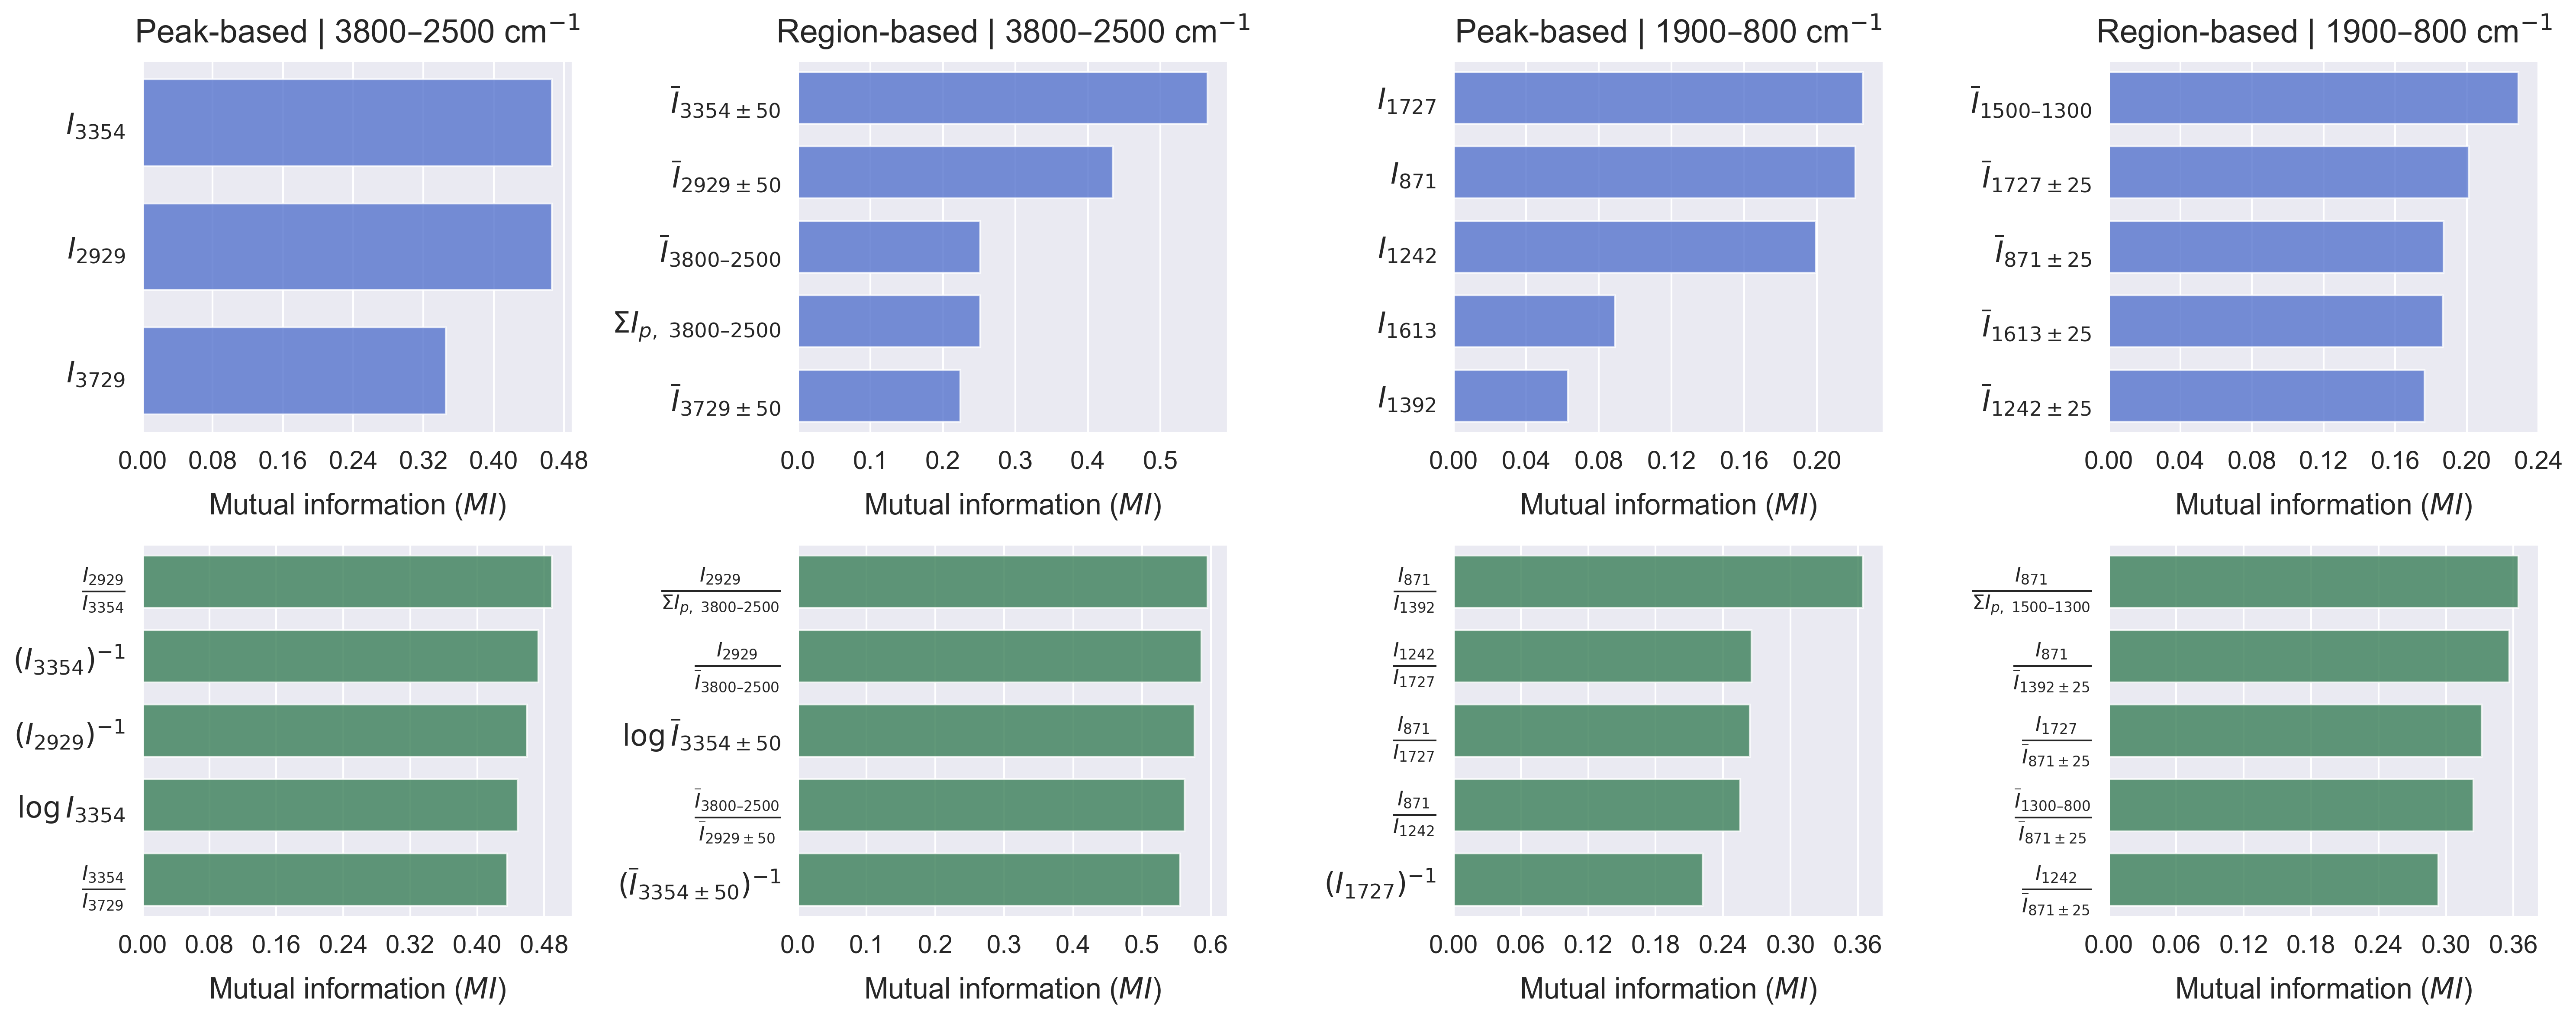

In [18]:
nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4), dpi=300)
axes = axes.flat

for i, feature_type in enumerate(feature_types):
    X_subset = features_df[features_description[feature_type]]
    y_subset = target

    mi = mutual_info_classif(X_subset, y_subset, discrete_features='auto', random_state=42)
    
    result_df = pd.DataFrame({
        'Feature': X_subset.columns,
        'Mutual_Info': mi
    })
    result_df = result_df.sort_values(by='Mutual_Info', ascending=False).head(5)

    ax = axes[i]
    
    kind = 'engineered' if 'engineered' in feature_type else 'base'
    plot_color = COLORS[kind]

    sns.barplot(
        data=result_df,
        x='Mutual_Info',
        y='Feature',
        ax=ax,
        color=plot_color,
        width=0.7,
        alpha=0.8
    )

    if i < 4:
        key = '_'.join(feature_type.split('_')[2:])
        ax.set_title(TITLE_MAP[key], fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=10)
        ax.set_xlabel('')
    
    ax.set_xlabel('Mutual information ($MI$)', fontsize=PLOT_STYLE['X_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['X_LABELPAD'])

    ax.set_ylabel('', fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])
    
    ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
    ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/mutual_info_barplots.svg')

plt.show()

## Visualization (BoxPlot & ViolinPlot)

In [19]:
base_feature_types = [
    'base_features_peaks_3800_2500',
    'base_features_intervals_3800_2500',
    'base_features_peaks_1900_800',
    'base_features_intervals_1900_800'
]

engineered_feature_types = [
    'engineered_features_peaks_3800_2500',
    'engineered_features_intervals_3800_2500',
    'engineered_features_peaks_1900_800',
    'engineered_features_intervals_1900_800'
]

### Function for sorting by *MS*

In [20]:
def get_ranked_features_by_mutual_info(features_df, target, features_description, feature_types):
    results_lst = []
    
    for feature_type in feature_types:
        X = features_df[features_description[feature_type]]
        mi = mutual_info_classif(X, target, discrete_features='auto', random_state=42)
        
        data = pd.DataFrame({
            'Feature': X.columns,
            'Mutual_Info': mi,
            'Feature_Type': feature_type
        })
        data = data.sort_values('Mutual_Info', ascending=False).reset_index(drop=True)
        
        results_lst.append(data)

    result_data = pd.concat(results_lst, ignore_index=True)
    return result_data

### *Base* features

#### Ranking features

In [21]:
ranked_data = get_ranked_features_by_mutual_info(
    features_df=features_df,
    target=target,
    features_description=features_description,
    feature_types=base_feature_types
)

print(ranked_data.shape)
ranked_data.head(3)

(28, 3)


Feature  Mutual_Info                   Feature_Type
0  $I_{3354}$     0.466296  base_features_peaks_3800_2500
1  $I_{2929}$     0.466174  base_features_peaks_3800_2500
2  $I_{3729}$     0.345189  base_features_peaks_3800_2500

In [22]:
top_n = 3

top_features_df = ranked_data.groupby('Feature_Type').head(top_n)

print(top_features_df.shape)
top_features_df.head(3)

(12, 3)


Feature  Mutual_Info                   Feature_Type
0  $I_{3354}$     0.466296  base_features_peaks_3800_2500
1  $I_{2929}$     0.466174  base_features_peaks_3800_2500
2  $I_{3729}$     0.345189  base_features_peaks_3800_2500

In [23]:
top_features = top_features_df['Feature']

#### Data preparation

In [24]:
df_vis = features_df[top_features].copy()

df_vis['target'] = target

desired_order = ['$d \\leq 2$', '$2 < d \\leq 5$', '$d > 5$']
df_vis['hue'] = hue
df_vis['hue'] = pd.Categorical(df_vis['hue'], categories=desired_order, ordered=True)

print(df_vis.shape)
df_vis.head(3)

(74, 14)


$I_{3354}$  $I_{2929}$  $I_{3729}$  \
division_1_size_bulk         1.0    0.492348    0.086137   
division_1_size_5            1.0    0.407795    0.027761   
division_1_size_3            1.0    0.618445    0.076469   

                      $\overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                      0.982638   
division_1_size_5                         0.981965   
division_1_size_3                         0.981511   

                      $\overline{I}_{2929 \pm 50}$  \
division_1_size_bulk                      0.495064   
division_1_size_5                         0.397724   
division_1_size_3                         0.581710   

                      $\overline{I}_{3800\text{–}2500}$  $I_{1727}$  \
division_1_size_bulk                           0.526201    0.420572   
division_1_size_5                              0.477909    0.382157   
division_1_size_3                              0.535789    0.364482   

                      $I_{871}$  $I_{1242}$  \
division_1_size_bulk   0.047336    0.457299   
division_1_size_5      0.091015    0.429170   
division_1_size_3      0.105957    0.401639   

                      $\overline{I}_{1500\text{–}1300}$  \
division_1_size_bulk                           0.571735   
division_1_size_5                              0.502368   
division_1_size_3                              0.523513   

                      $\overline{I}_{1727 \pm 25}$  \
division_1_size_bulk                      0.414105   
division_1_size_5                         0.374613   
division_1_size_3                         0.363813   

                      $\overline{I}_{871 \pm 25}$  target             hue  
division_1_size_bulk                     0.046925       2         $d > 5$  
division_1_size_5                        0.092522       1  $2 < d \leq 5$  
division_1_size_3                        0.110049       1  $2 < d \leq 5$

In [25]:
feature_type_by_feature = dict(zip(ranked_data['Feature'], ranked_data['Feature_Type']))

grouped_features = defaultdict(list)

for feature in df_vis.columns:
    if feature in ['target', 'hue']:
        continue
    
    feature_type = feature_type_by_feature[feature]
    grouped_features[feature_type].append(feature)

#### Box plot

In [26]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'BOX_WIDTH': 0.6,
    'STRIP_ALPHA': 0.7,
    'STRIP_SIZE': 8,
    'STRIP_LINEWIDTH': 0.5,
    'STRIP_DODGE': True
}

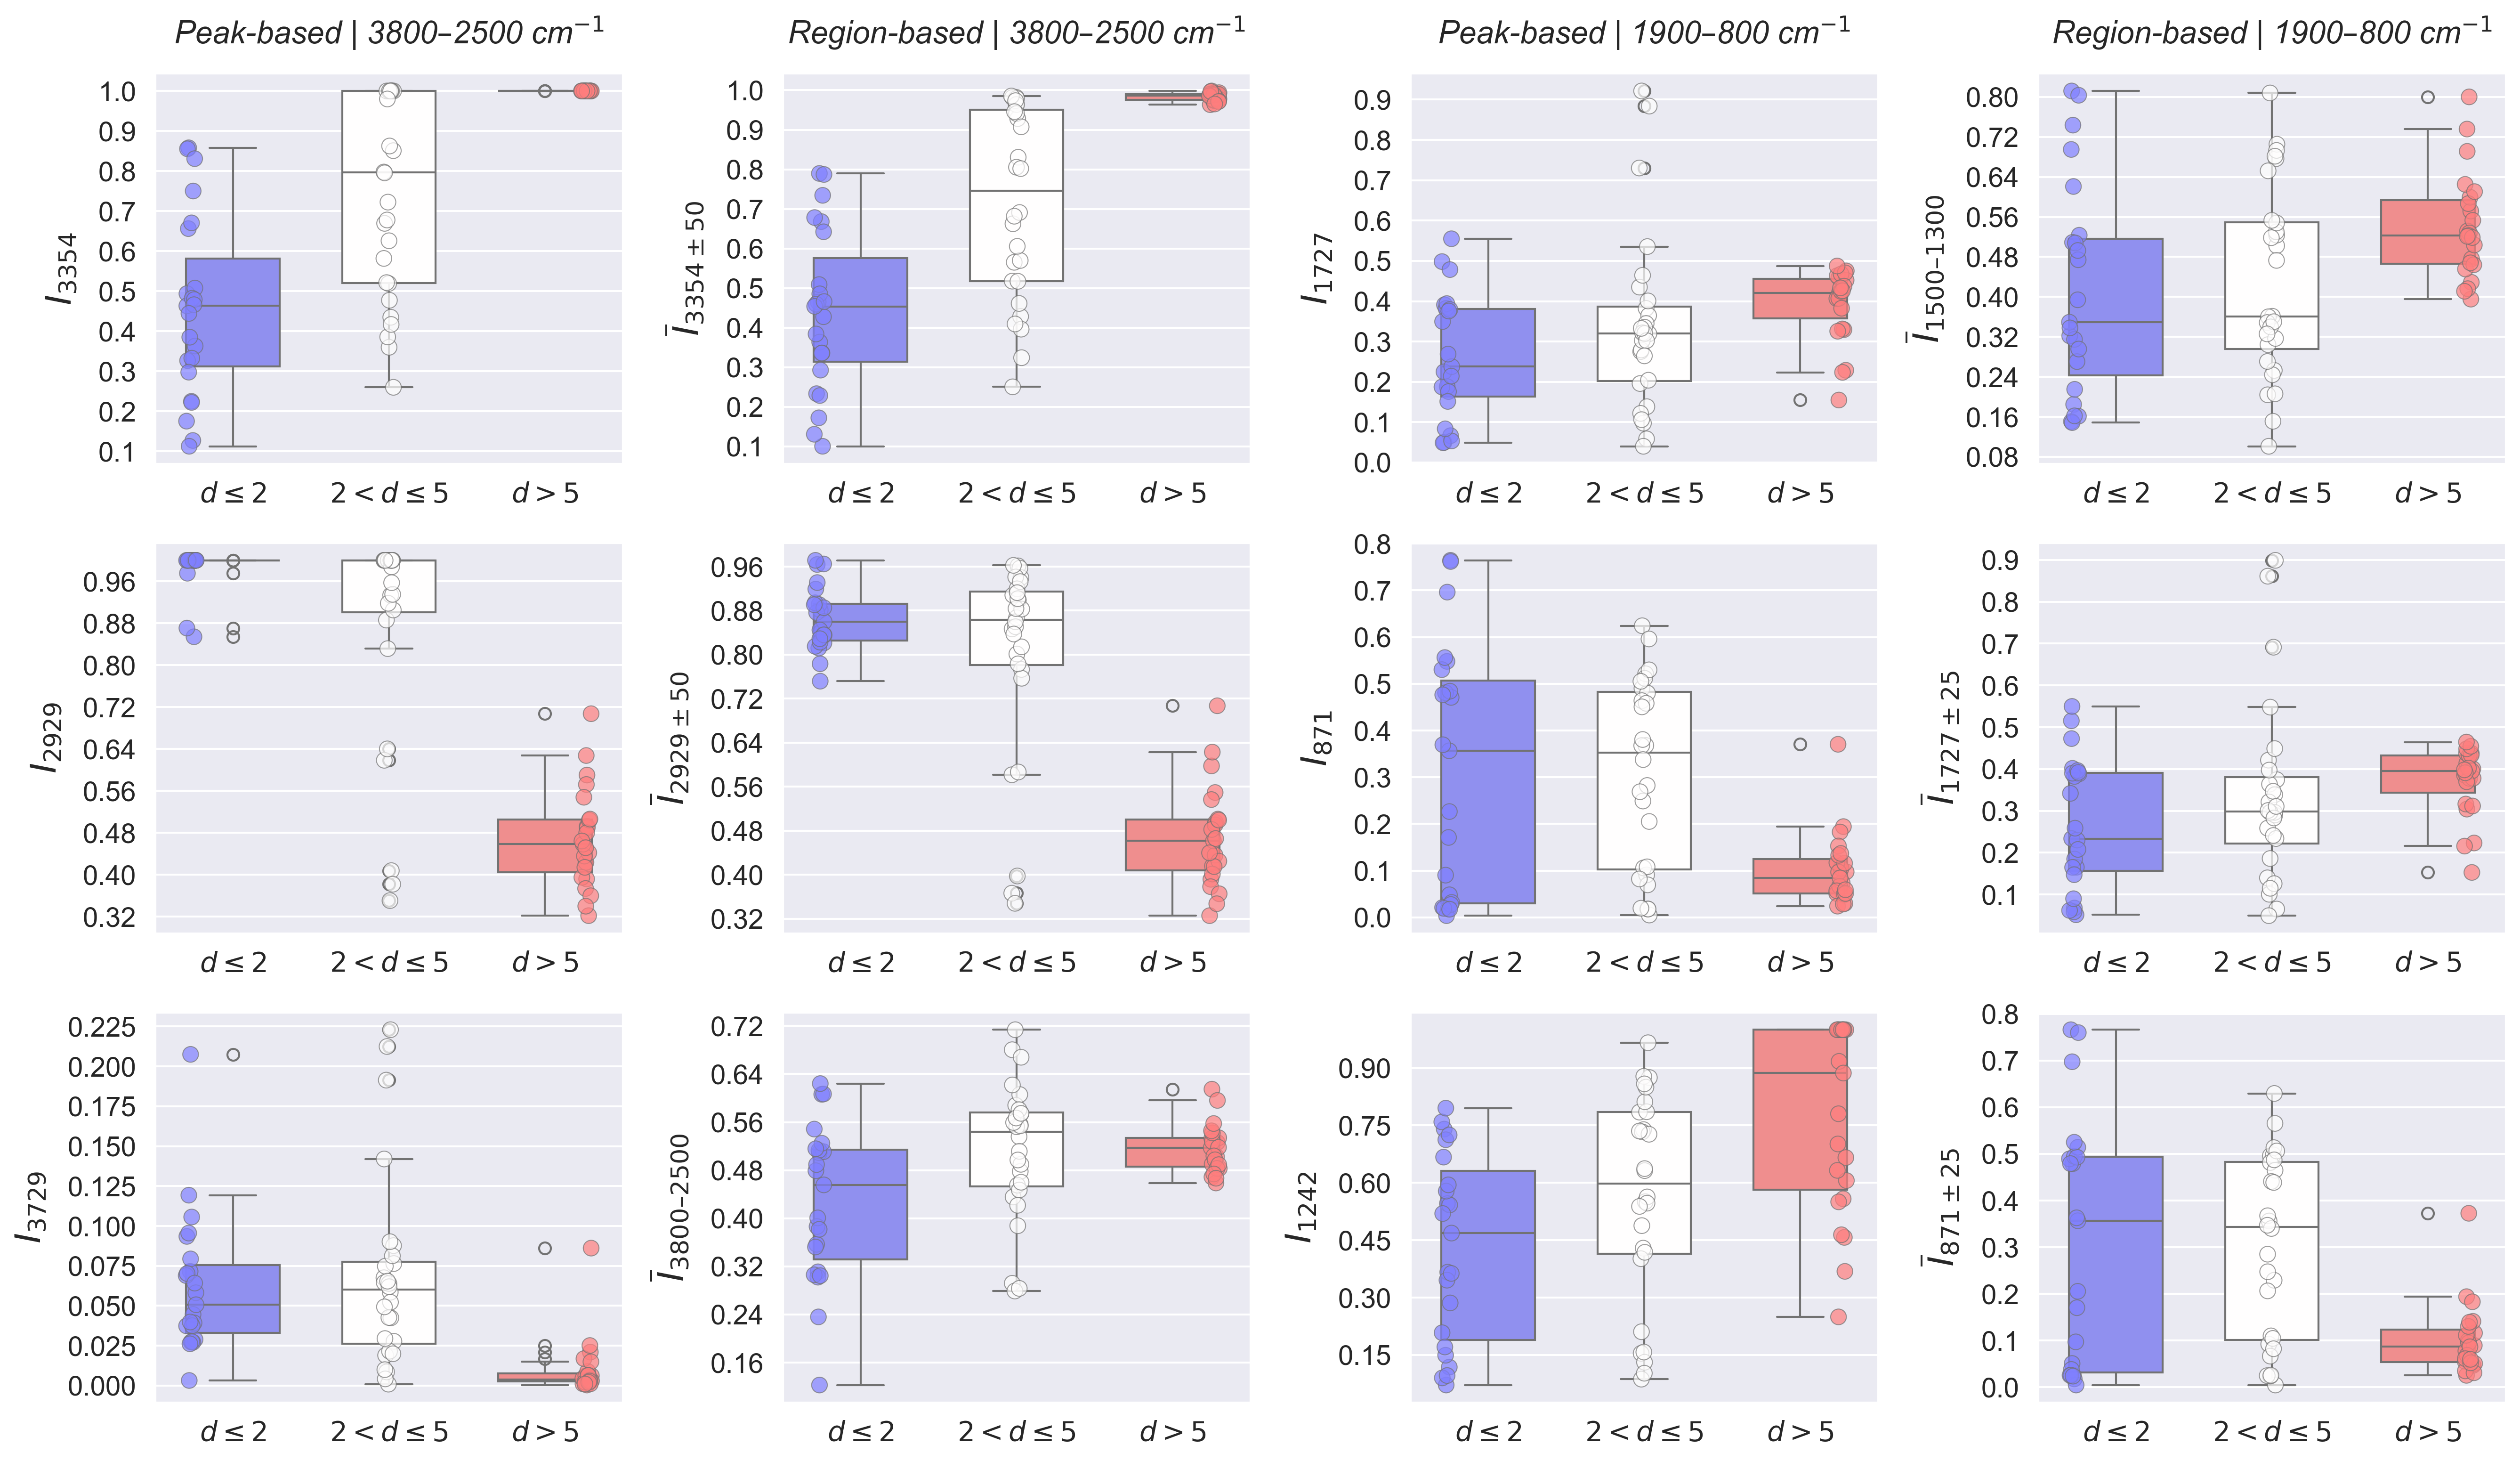

In [27]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.boxplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette='bwr',
            width=PLOT_STYLE['BOX_WIDTH'],
            order=desired_order,
            ax=ax
        )

        sns.stripplot(
            data=df_vis,
            x='hue',
            y=feature,
            order=desired_order,
            palette='bwr',
            dodge=PLOT_STYLE['STRIP_DODGE'],
            alpha=PLOT_STYLE['STRIP_ALPHA'],
            size=PLOT_STYLE['STRIP_SIZE'],
            linewidth=PLOT_STYLE['STRIP_LINEWIDTH'],
            ax=ax,
            legend=False
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title, fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(feature, fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])

        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

for col_idx, (_, features) in enumerate(grouped_features.items()):
    for r in range(len(features), 3):  # 3 = nrows
        axes[col_idx * 3 + r].axis("off")

plt.tight_layout()

plt.savefig(f'{path_to_save}/boxplot_base_features.svg')

plt.show()

#### Violin plot

In [28]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'VIOLIN_INNER': 'box',  # 'box', 'quartile', 'point', None
    'VIOLIN_CUT': 0,
    'VIOLIN_LINEWIDTH': 1,
    'PALETTE': 'bwr',
}


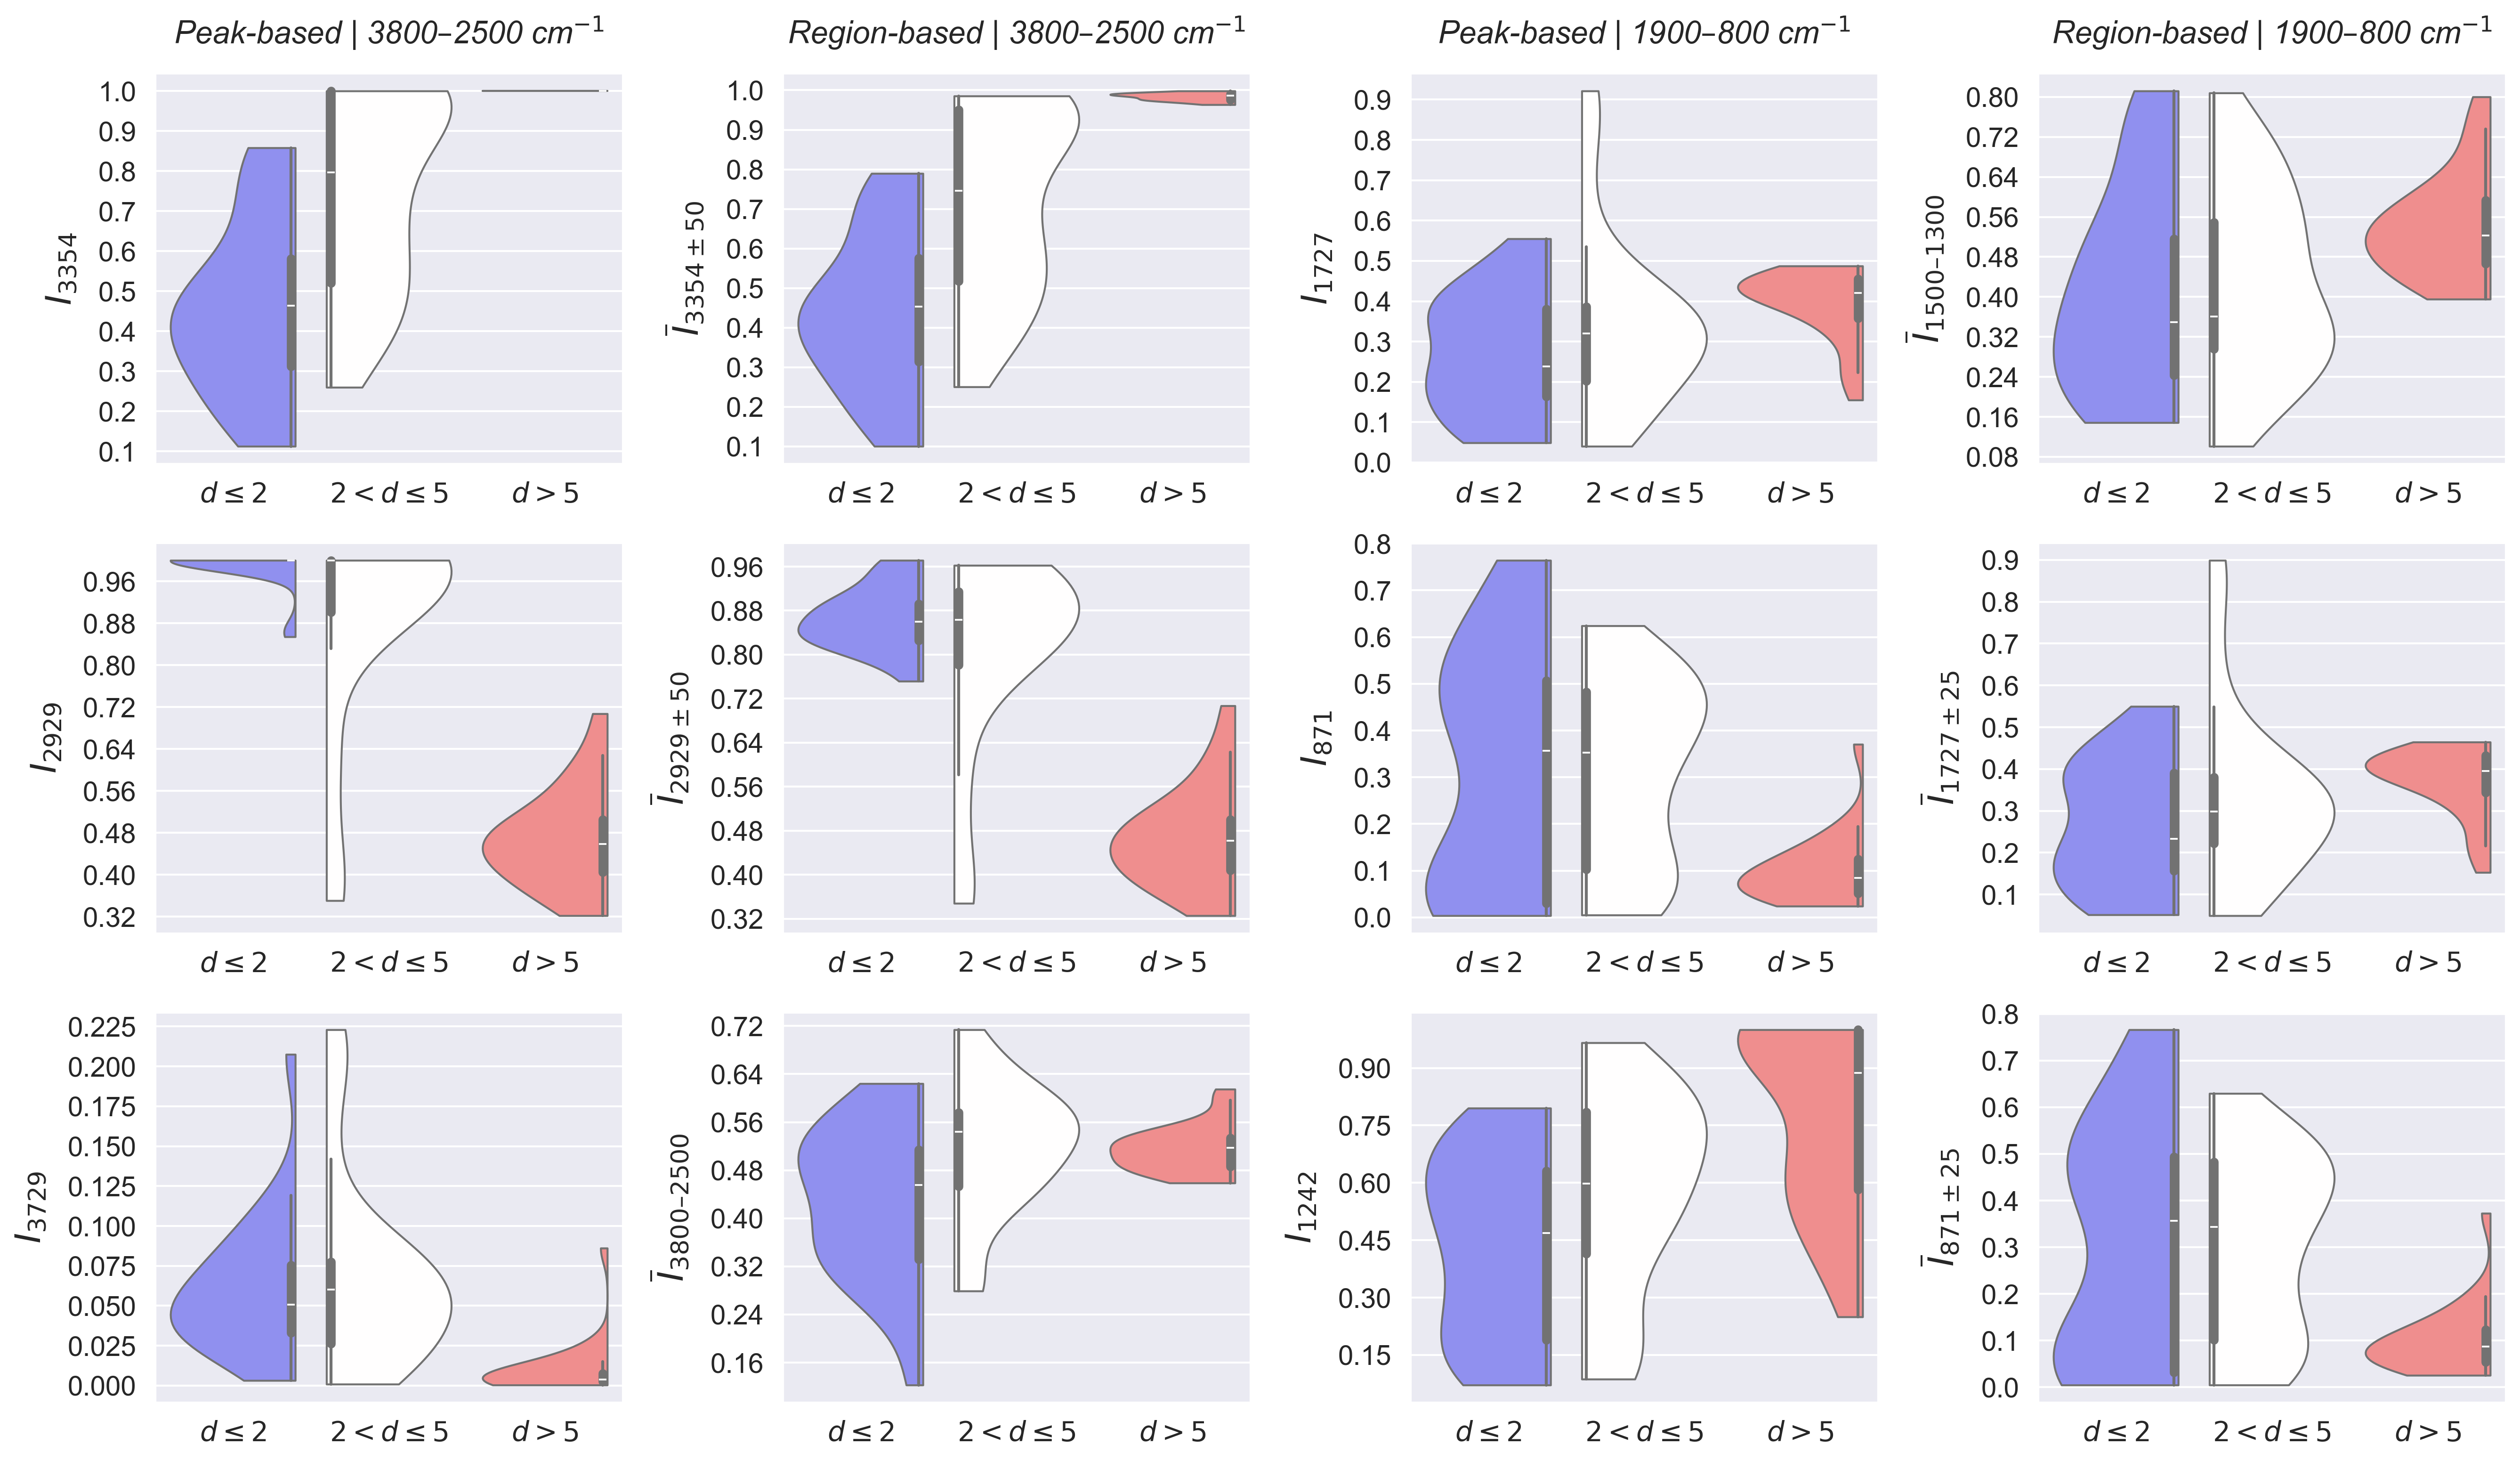

In [29]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.violinplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette=PLOT_STYLE['PALETTE'],
            cut=PLOT_STYLE['VIOLIN_CUT'],
            inner=PLOT_STYLE['VIOLIN_INNER'],
            linewidth=PLOT_STYLE['VIOLIN_LINEWIDTH'],
            split=True,
            order=desired_order,
            ax=ax
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title,
                         fontsize=PLOT_STYLE['TITLE_FONT_SIZE'],
                         fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'],
                         pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(
            feature,
            fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'],
            labelpad=PLOT_STYLE['Y_LABELPAD']
        )

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

for col_idx, (_, features) in enumerate(grouped_features.items()):
    for r in range(len(features), 3):  # 3 = nrows
        axes[col_idx * 3 + r].axis("off")

plt.tight_layout()

plt.savefig(f'{path_to_save}/violinplot_base_features.svg')

plt.show()

### *Engineered* features

#### Ranking features

In [30]:
ranked_data = get_ranked_features_by_mutual_info(
    features_df=features_df,
    target=target,
    features_description=features_description,
    feature_types=engineered_feature_types
)

print(ranked_data.shape)
ranked_data.head(3)

(220, 3)


Feature  Mutual_Info  \
0  $\frac{I_{2929}}{I_{3354}}$     0.489368   
1            $(I_{3354})^{-1}$     0.473219   
2            $(I_{2929})^{-1}$     0.459749   

                          Feature_Type  
0  engineered_features_peaks_3800_2500  
1  engineered_features_peaks_3800_2500  
2  engineered_features_peaks_3800_2500

In [31]:
top_n = 3

top_features_df = ranked_data.groupby('Feature_Type').head(top_n)

print(top_features_df.shape)
top_features_df.head(3)

(12, 3)


Feature  Mutual_Info  \
0  $\frac{I_{2929}}{I_{3354}}$     0.489368   
1            $(I_{3354})^{-1}$     0.473219   
2            $(I_{2929})^{-1}$     0.459749   

                          Feature_Type  
0  engineered_features_peaks_3800_2500  
1  engineered_features_peaks_3800_2500  
2  engineered_features_peaks_3800_2500

In [32]:
top_features = top_features_df['Feature']

#### Data preparation

In [33]:
df_vis = features_df[top_features].copy()
df_vis['target'] = target
df_vis['hue'] = hue

print(df_vis.shape)
df_vis.head(3)

(74, 14)


$\frac{I_{2929}}{I_{3354}}$  $(I_{3354})^{-1}$  \
division_1_size_bulk                     0.492348                1.0   
division_1_size_5                        0.407795                1.0   
division_1_size_3                        0.618445                1.0   

                      $(I_{2929})^{-1}$  \
division_1_size_bulk           2.031084   
division_1_size_5              2.452211   
division_1_size_3              1.616959   

                      $\frac{I_{2929}}{\Sigma I_{p,\ 3800\text{–}2500}}$  \
division_1_size_bulk                                            0.311912   
division_1_size_5                                               0.284068   
division_1_size_3                                               0.364883   

                      $\frac{I_{2929}}{\overline{I}_{3800\text{–}2500}}$  \
division_1_size_bulk                                            0.935665   
division_1_size_5                                               0.853290   
division_1_size_3                                               1.154270   

                      $\log \overline{I}_{3354 \pm 50}$  \
division_1_size_bulk                          -0.017515   
division_1_size_5                             -0.018199   
division_1_size_3                             -0.018662   

                      $\frac{I_{871}}{I_{1392}}$  $\frac{I_{1242}}{I_{1727}}$  \
division_1_size_bulk                    0.062236                     1.087326   
division_1_size_5                       0.132394                     1.123018   
division_1_size_3                       0.152116                     1.101946   

                      $\frac{I_{871}}{I_{1727}}$  \
division_1_size_bulk                    0.112551   
division_1_size_5                       0.238161   
division_1_size_3                       0.290705   

                      $\frac{I_{871}}{\Sigma I_{p,\ 1500\text{–}1300}}$  \
division_1_size_bulk                                           0.062236   
division_1_size_5                                              0.132394   
division_1_size_3                                              0.152116   

                      $\frac{I_{871}}{\overline{I}_{1392 \pm 25}}$  \
division_1_size_bulk                                      0.063983   
division_1_size_5                                         0.136139   
division_1_size_3                                         0.156272   

                      $\frac{I_{1727}}{\overline{I}_{871 \pm 25}}$  target  \
division_1_size_bulk                                      8.962651       2   
division_1_size_5                                         4.130433       1   
division_1_size_3                                         3.311981       1   

                                 hue  
division_1_size_bulk         $d > 5$  
division_1_size_5     $2 < d \leq 5$  
division_1_size_3     $2 < d \leq 5$

In [34]:
feature_type_by_feature = dict(zip(ranked_data['Feature'], ranked_data['Feature_Type']))

grouped_features = defaultdict(list)

for feature in df_vis.columns:
    if feature in ['target', 'hue']:
        continue
    
    feature_type = feature_type_by_feature[feature]
    grouped_features[feature_type].append(feature)

#### Box plot

In [35]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'BOX_WIDTH': 0.6,
    'STRIP_ALPHA': 0.7,
    'STRIP_SIZE': 8,
    'STRIP_LINEWIDTH': 0.5,
    'STRIP_DODGE': True
}

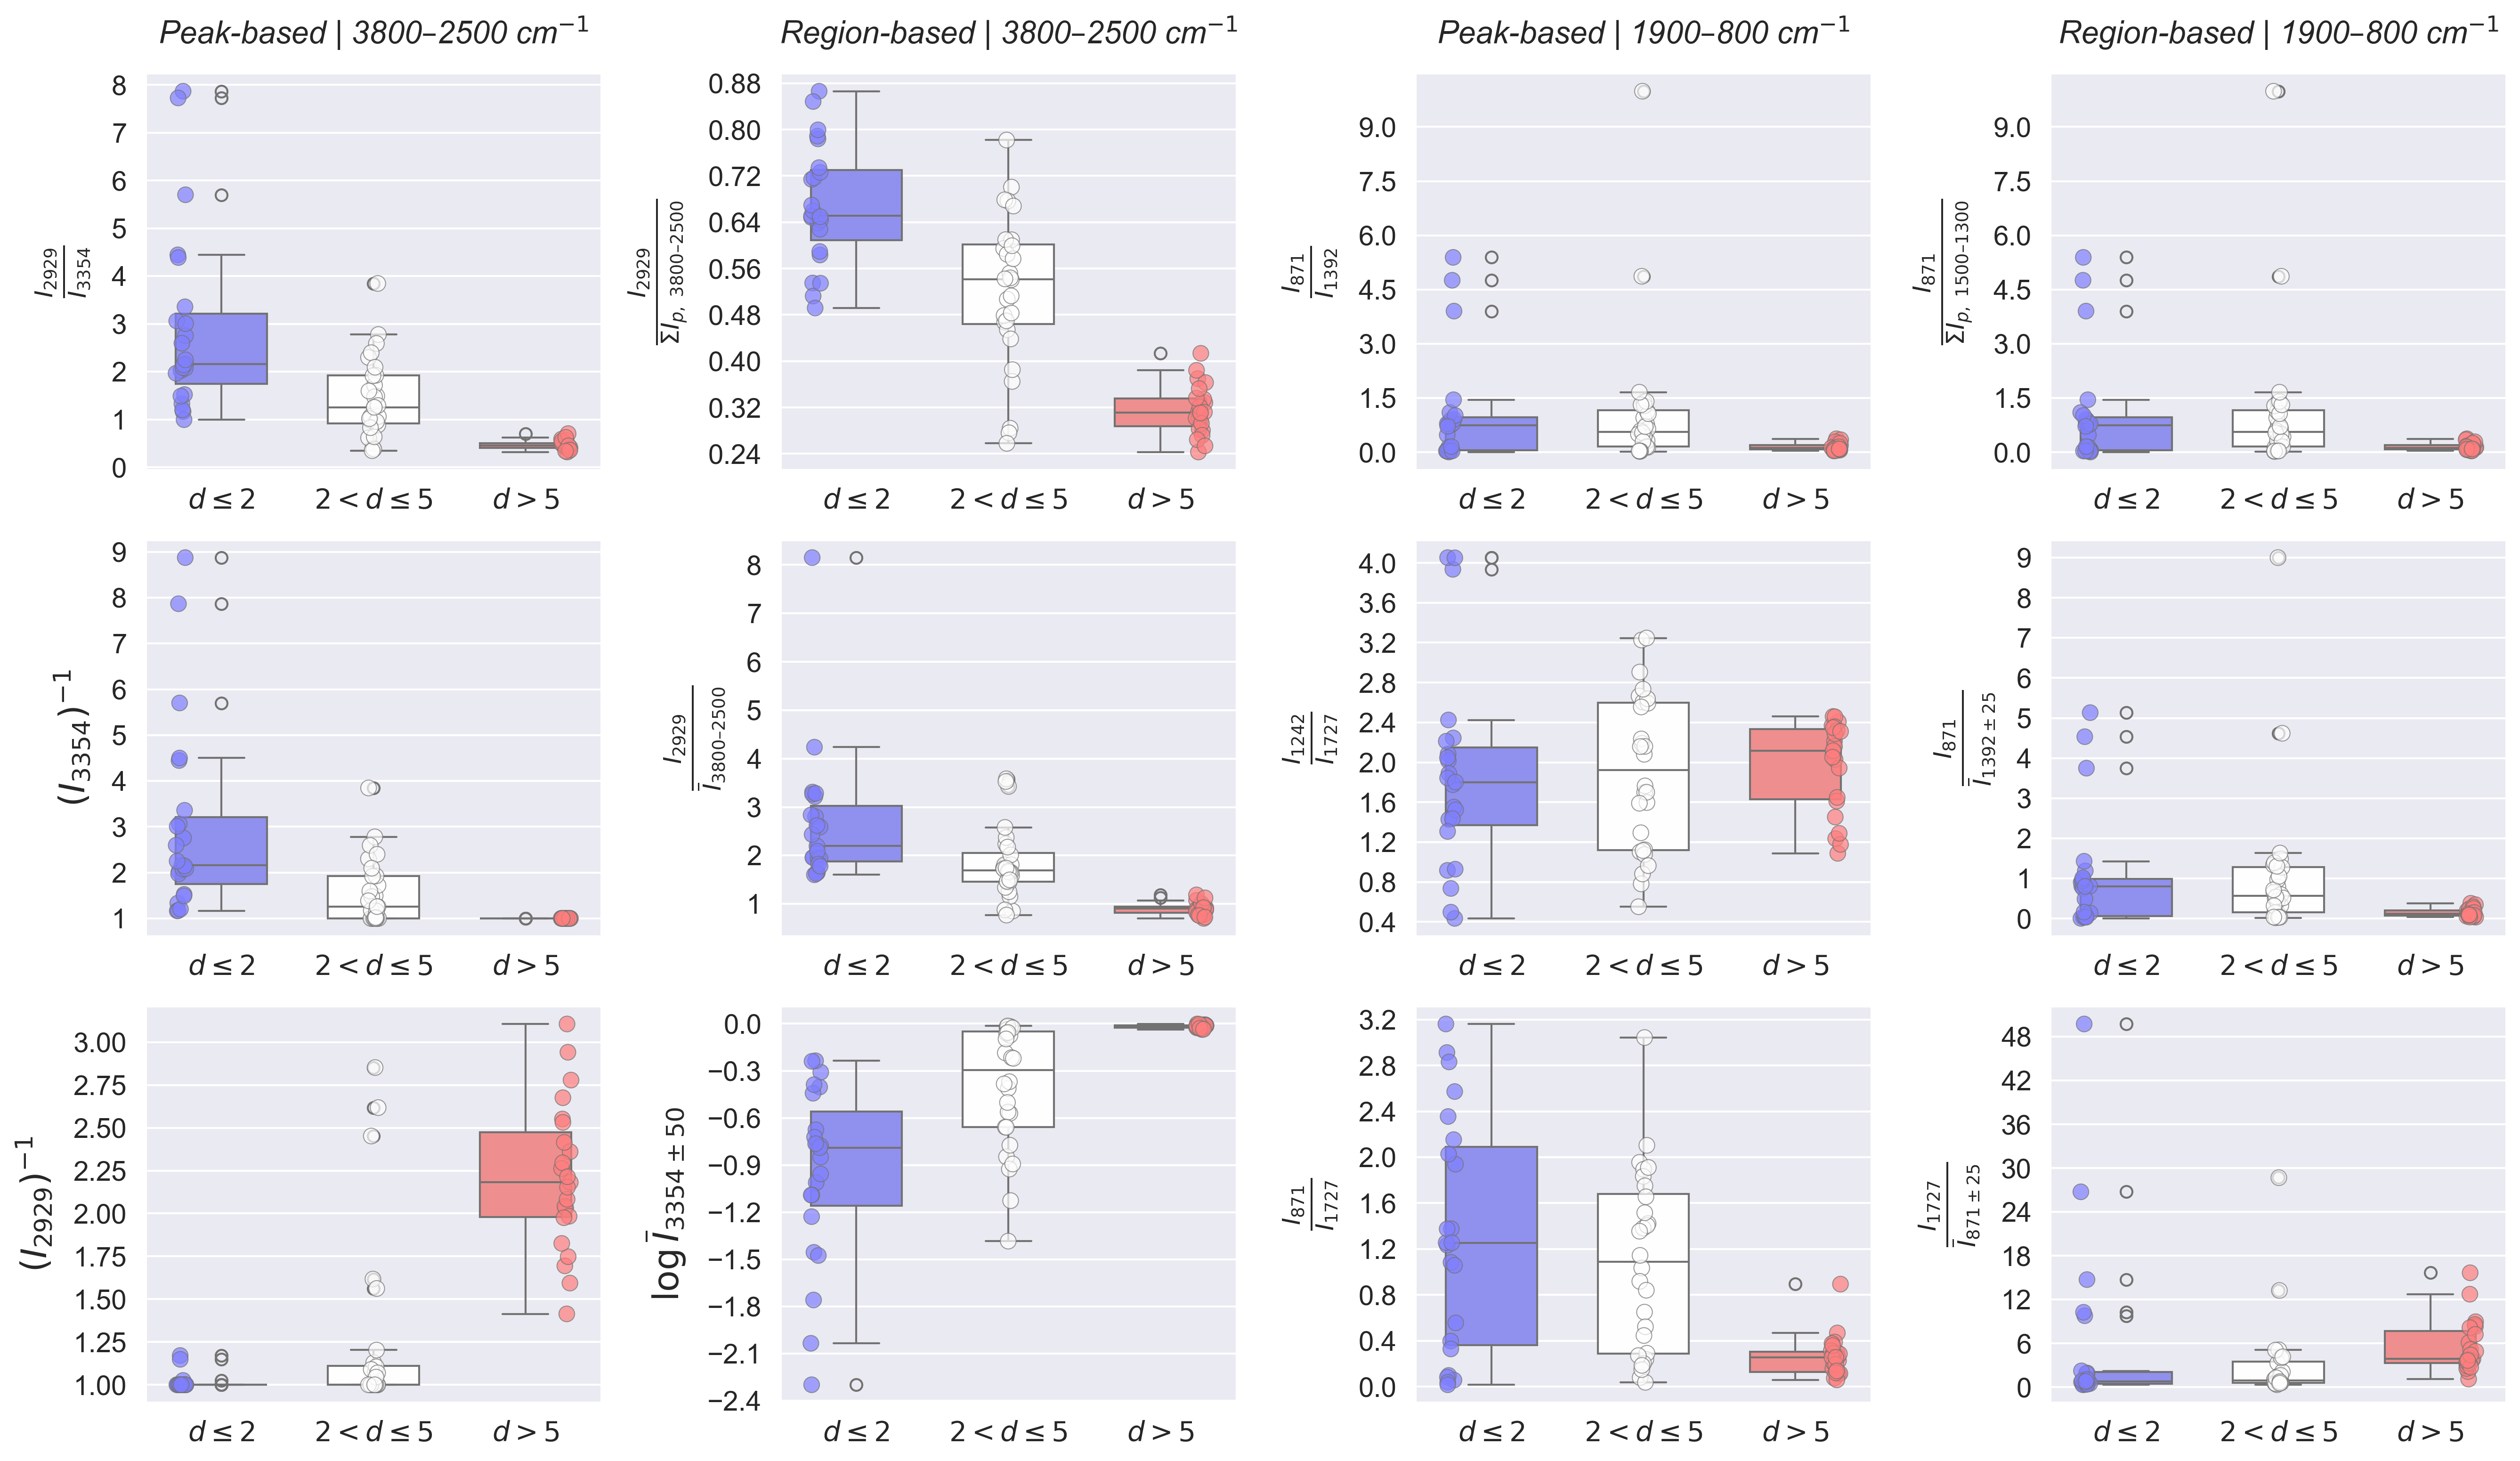

In [36]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.boxplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette='bwr',
            width=PLOT_STYLE['BOX_WIDTH'],
            order=desired_order,
            ax=ax
        )

        sns.stripplot(
            data=df_vis,
            x='hue',
            y=feature,
            order=desired_order,
            palette='bwr',
            dodge=PLOT_STYLE['STRIP_DODGE'],
            alpha=PLOT_STYLE['STRIP_ALPHA'],
            size=PLOT_STYLE['STRIP_SIZE'],
            linewidth=PLOT_STYLE['STRIP_LINEWIDTH'],
            ax=ax,
            legend=False
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title, fontsize=PLOT_STYLE['TITLE_FONT_SIZE'], fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'], pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(feature, fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'], labelpad=PLOT_STYLE['Y_LABELPAD'])

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])

        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/boxplot_engineered_features.svg')

plt.show()

#### Violin plot

In [37]:
PLOT_STYLE = {
    'TITLE_FONT_SIZE': 16,
    'TITLE_FONTSTYLE': 'italic',
    'X_LABEL_FONT_SIZE': 16,
    'Y_LABEL_FONT_SIZE': 18,
    'X_TICK_LABEL_FONT_SIZE': 14,
    'Y_TICK_LABEL_FONT_SIZE': 14,
    'X_LABELPAD': 10,
    'Y_LABELPAD': 10,
    'X_NBINS': 10,
    'VIOLIN_INNER': 'box', # 'box', 'quartile', 'point', None
    'VIOLIN_CUT': 0,
    'VIOLIN_LINEWIDTH': 1,
    'PALETTE': 'bwr',
}

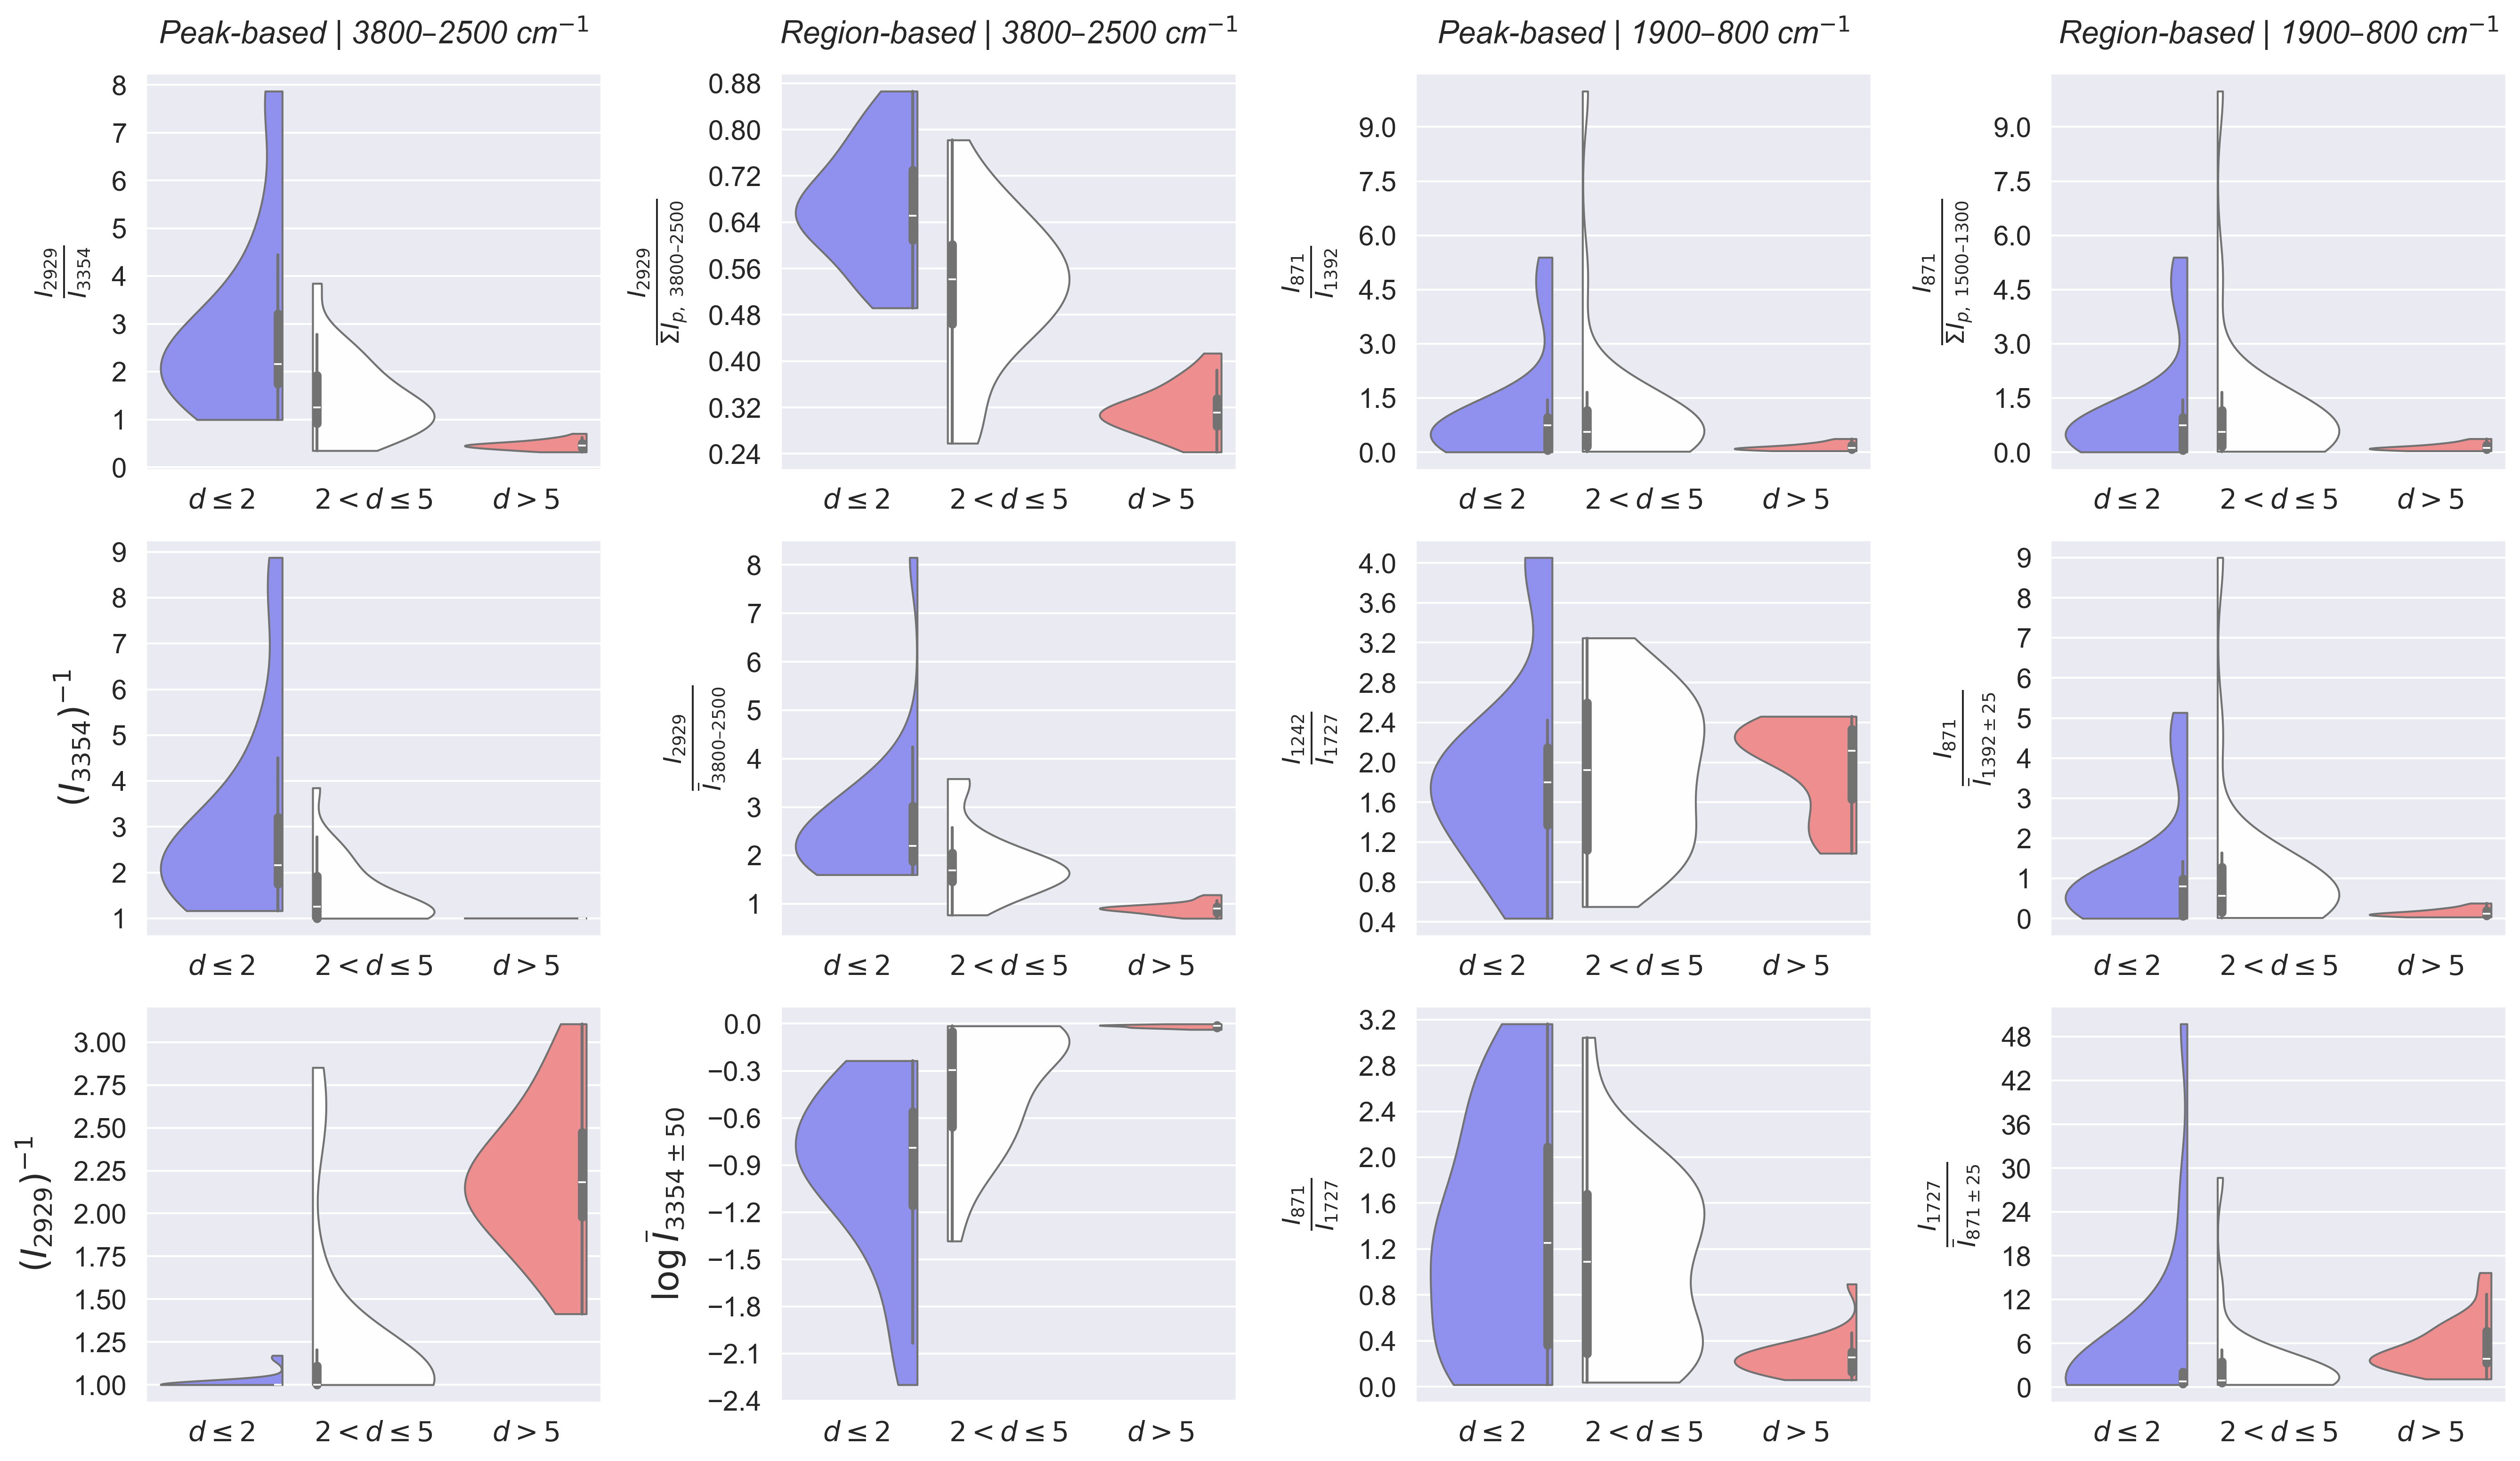

In [38]:
ncols = len(grouped_features)
nrows = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4.5, nrows * 3.5), dpi=300)
axes = axes.T.flatten()

for col_idx, (feature_type, features) in enumerate(grouped_features.items()):
    for row_idx, feature in enumerate(features):
        ax = axes[col_idx * 3 + row_idx]

        sns.violinplot(
            data=df_vis,
            x='hue',
            y=feature,
            palette=PLOT_STYLE['PALETTE'],
            cut=PLOT_STYLE['VIOLIN_CUT'],
            inner=PLOT_STYLE['VIOLIN_INNER'],
            linewidth=PLOT_STYLE['VIOLIN_LINEWIDTH'],
            split=True,
            order=desired_order,
            ax=ax
        )

        if row_idx == 0:
            key = '_'.join(feature_type.split('_')[2:])
            title = f'{TITLE_MAP.get(key, feature_type)}'
            ax.set_title(title,
                         fontsize=PLOT_STYLE['TITLE_FONT_SIZE'],
                         fontstyle=PLOT_STYLE['TITLE_FONTSTYLE'],
                         pad=15)

        ax.set_xlabel('')
        ax.set_ylabel(
            feature,
            fontsize=PLOT_STYLE['Y_LABEL_FONT_SIZE'],
            labelpad=PLOT_STYLE['Y_LABELPAD']
        )

        ax.tick_params(axis='x', labelsize=PLOT_STYLE['X_TICK_LABEL_FONT_SIZE'])
        ax.tick_params(axis='y', labelsize=PLOT_STYLE['Y_TICK_LABEL_FONT_SIZE'])
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=PLOT_STYLE['X_NBINS']))

plt.tight_layout()

plt.savefig(f'{path_to_save}/violinplot_engineered_features.svg')

plt.show()